##### in recent years,city hotel and resort hotel have seen high cancellation rates.eachn hotel is now dealing with  a number of issuess as result,including fewer revenues and less than ideal hostel room use. consequently lowering cancellation rates is both hotels primary goal in order to increase their efficency in generating revenue and for us to offer through business advice to adress this problem

#### the analysis of hotel booking cancellations as well as other as other factors that have no bearing on their  business and yearly revenue generation are the main topics of this report

# reasearcher questions
- what are the variables that affect hotel reservation cancellations?
- how can we make hotel reservation cancellations better?
- how will hotels be assisted in making pricing and promotional decisions?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("C:\\Users\\ADMIN\\OneDrive\\resume p\\hotel_booking.csv.zip")

In [3]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [4]:
df1.shape

(119390, 36)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df1['reservation_status_date']=pd.to_datetime(df1['reservation_status_date'])

In [7]:
for col in df1.describe(include='object').columns:
    print(col)
    print(df1[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [8]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [10]:
df1=df1[df1['adr']<5000]

#### data analysis and visualizatiom

is_canceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64


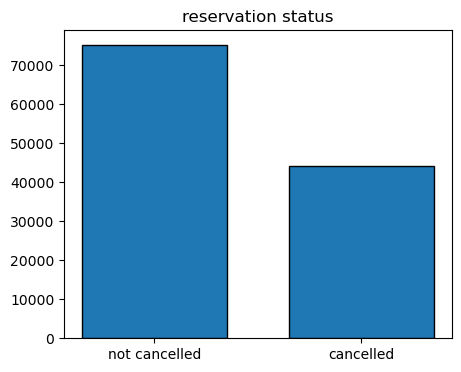

In [11]:
cancelled=df1['is_canceled'].value_counts(normalize=True)
print(cancelled)
plt.figure(figsize=(5,4))
plt.title('reservation status')
plt.bar(['not cancelled','cancelled'],df1['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

In [22]:
df1['is_canceled']=df1['is_canceled'].astype(str)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10272\3201049152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['is_canceled']=df1['is_canceled'].astype(str)


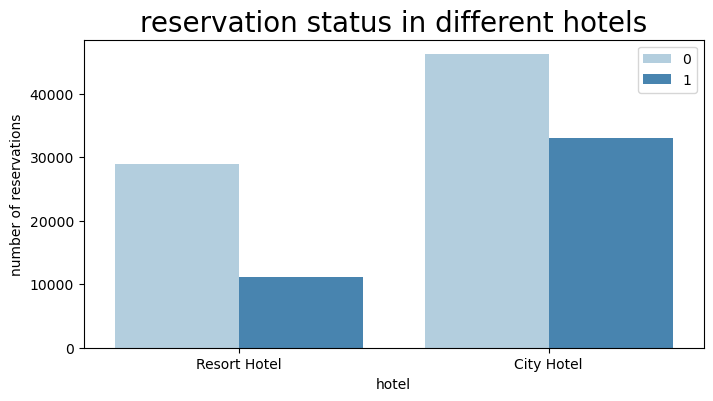

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
axl=sns.countplot(x='hotel',hue='is_canceled',data=df1,palette='Blues')

#automatically handle the legend
axl.legend(loc='upper right',bbox_to_anchor=(1,1))

#set title and labels using the axes object
axl.set_title('reservation status in different hotels',size=20)
axl.set_xlabel('hotel')
axl.set_ylabel('number of reservations')
plt.show()

In [13]:
resort_hotel=df1[df1['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [14]:
city_hotel=df1[df1['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582738
1    0.417262
Name: proportion, dtype: float64

In [15]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

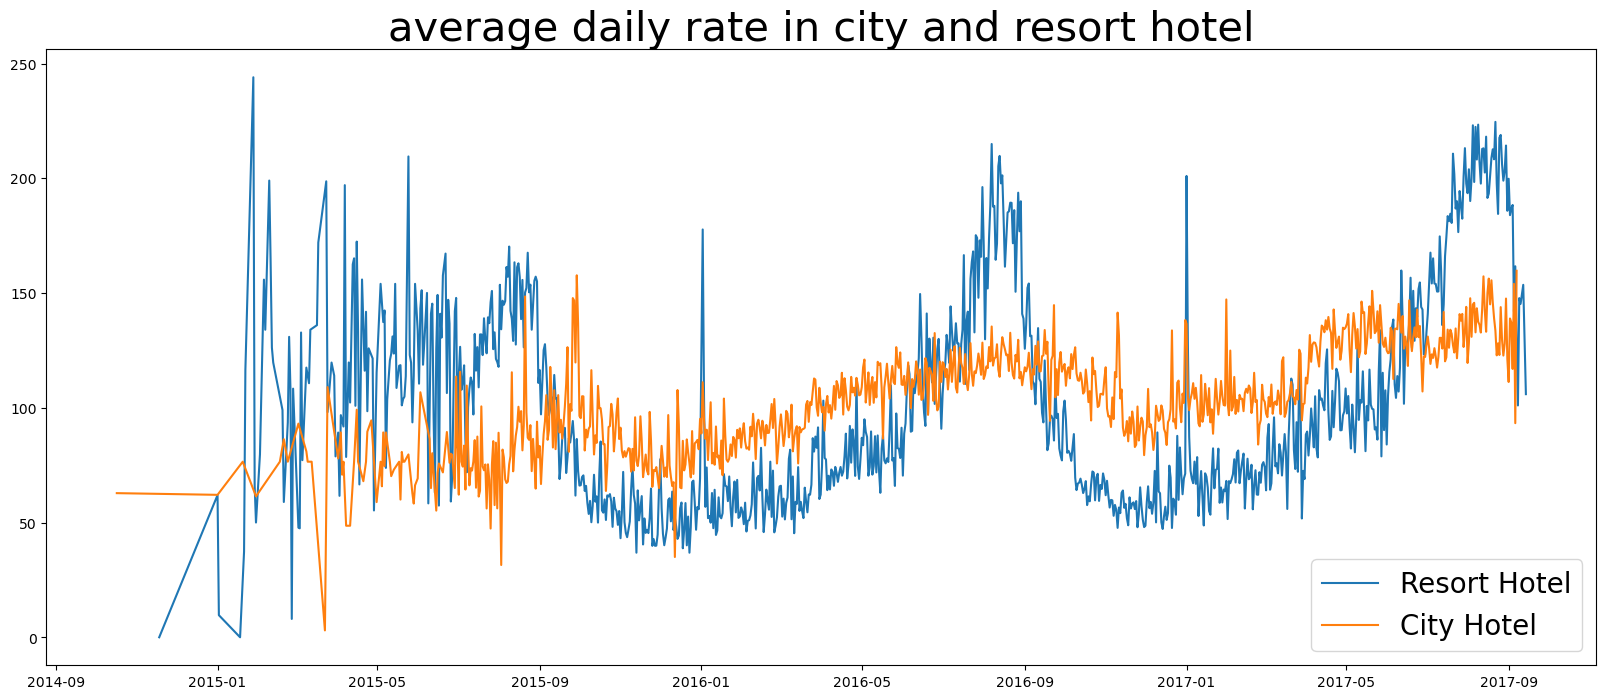

In [16]:
plt.figure(figsize=(20,8))
plt.title('average daily rate in city and resort hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10272\2806979969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month']=df1['reservation_status_date'].dt.month


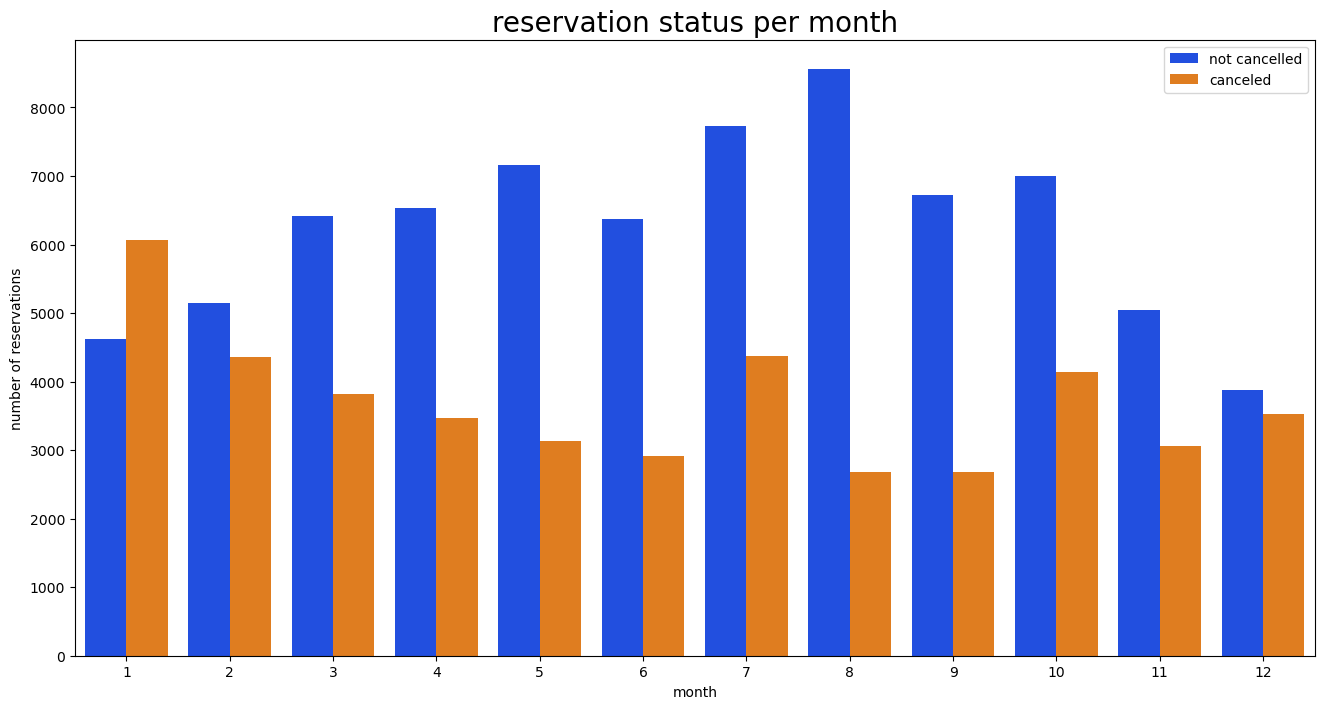

In [24]:
df1['month']=df1['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
axl=sns.countplot(x='month',hue='is_canceled',data=df1,palette='bright')
legend_lagends,_=axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1,1))
plt.title('reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not cancelled','canceled'])
plt.show()

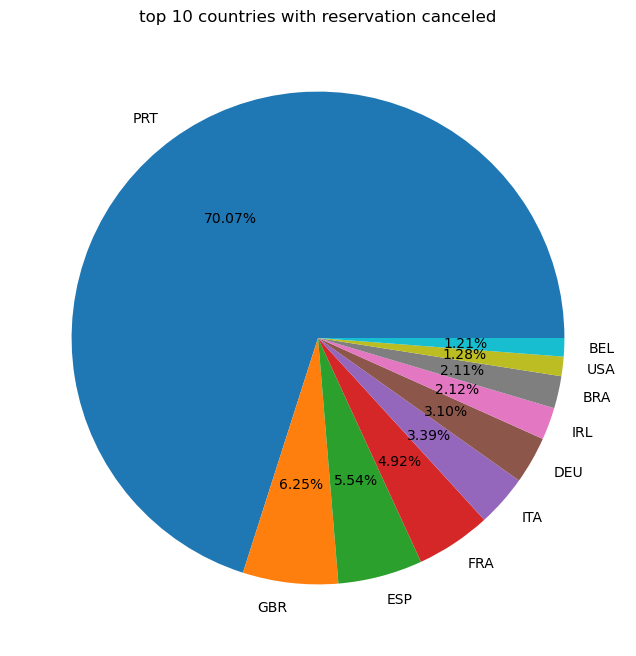

In [18]:
cancelled=df1[df1['is_canceled']==1]
top_10_countries=cancelled['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('top 10 countries with reservation canceled')
plt.pie(top_10_countries,autopct='%1.2f%%',labels=top_10_countries.index)
plt.show()

In [19]:
df1['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24218
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [20]:
df1['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473050
Offline TA/TO    0.202850
Groups           0.165937
Direct           0.105588
Corporate        0.044351
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

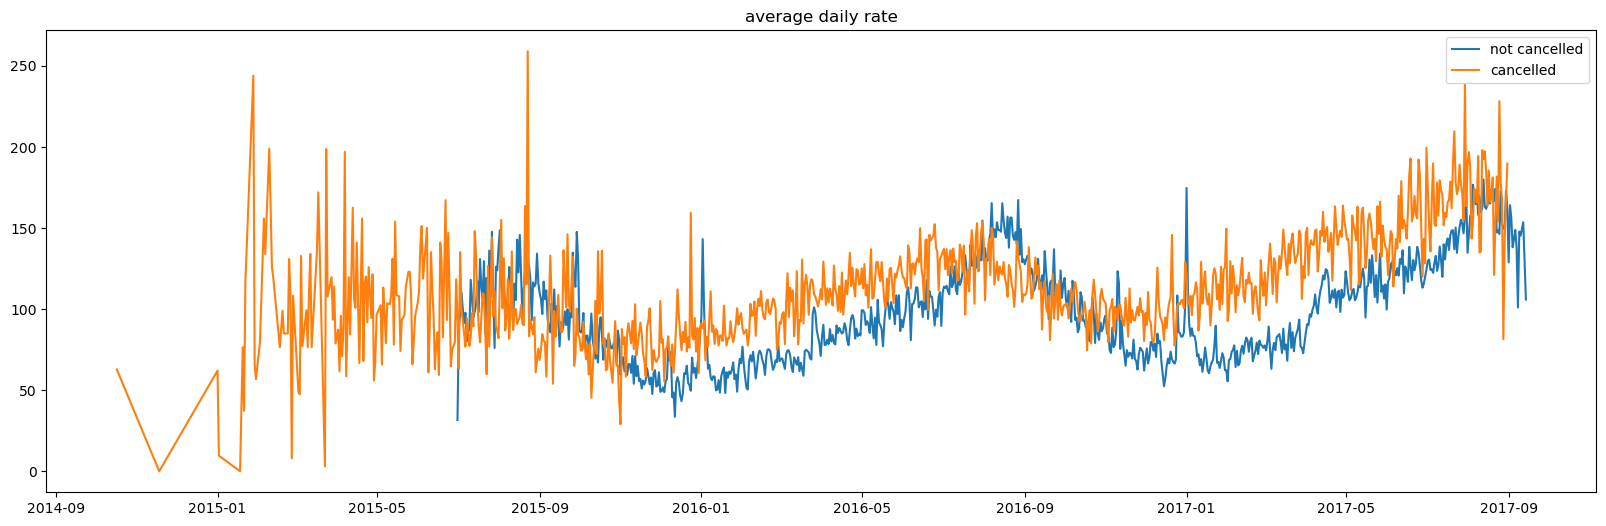

In [21]:
cancelled_adr=cancelled.groupby('reservation_status_date')[['adr']].mean()
cancelled_adr.reset_index(inplace=True)
cancelled_adr.sort_values('reservation_status_date',inplace=True)
not_cancelled_adr=df1[df1['is_canceled']==0]
not_cancelled_adr=not_cancelled_adr.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_adr.reset_index(inplace=True)
not_cancelled_adr.sort_values('reservation_status_date',inplace=True)
plt.figure(figsize=(20,6))
plt.title('average daily rate')
plt.plot(not_cancelled_adr['reservation_status_date'],not_cancelled_adr['adr'],label='not cancelled')
plt.plot(cancelled_adr['reservation_status_date'],cancelled_adr['adr'],label='cancelled')
plt.legend()

### suggestions based on my analysis

- 1.cancellation rates rise as the price does.in order to present cancellations of reservations hotels could work on their pricing strategies and
try to lower the rates for specific hotels based on locations.they can also provide some discounts to the consumers
- 2. as the ratio of the cancellations and not cancellation of resort hotel is higher in the resort hotelthan the city hotels.so the hotels should provide a resonable discounts on the room prices on weekends or on holidays
- 3. in the month of january hotels can start compaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month
- 4.they can also increase the quality of their hotels and their services mainly in portual to reduce the cancellation rate